In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Nonlinear Dynamics - Unit 9
# Homework 9.1

In [8]:
#load data in a list of 3-tuples

pointsfile = open("CapDimData.dat",'r')
points = []
for line in pointsfile:
    points.append(tuple(float(x) for x in line.split(",")))

## Question 1

Implement a function for counting the number of boxes $N(\varepsilon)$ of side length $\varepsilon$ needed to cover a two-dimensional trajectory of a dynamical system.  Your code should take the trajectory and an $\varepsilon$; it should output $N(\varepsilon)$.

In [9]:
#box-counting function
def N(epsilon):
    #find minimums for offset
    x_min = points[0][0]
    z_min = points[0][2]
    for point in points:
        if point[0] < x_min:
            x_min = point[0]
        if point[2] < z_min:
            z_min = point[2]
    
    #use a python set to count balls without duplication
    balls = set()
    for point in points:
        ball_x = math.ceil((point[0] - x_min)/epsilon)
        ball_z = math.ceil((point[2] - z_min)/epsilon)
        balls.add(tuple((ball_x,ball_z)))
    return len(balls)

## Question 1.a 

Using an $x$, $z$ projection (i.e., only the $x$ and $z$ coordinates) of this trajectory, with $\varepsilon = 0.05$, what is $N(\varepsilon)$?

In [10]:
N(0.05)

13968

## Question 1.b

Comparing to the total number of points in the trajectory

In [11]:
len(points)

14000

## Question 1.c

Again using an $x$, $z$ projection of this trajectory, but with $\varepsilon = 0.5$, find $N(\varepsilon)$.

In [12]:
N(0.5)

4345

## Question 2

Use the function from problem 1 and a loop to implement the box-counting algorithm.  Use the logic from the first problem to choose a good range of $\varepsilon$.  This should generate a plot of $\log(N(\varepsilon))$ versus $\log(1/\varepsilon)$.

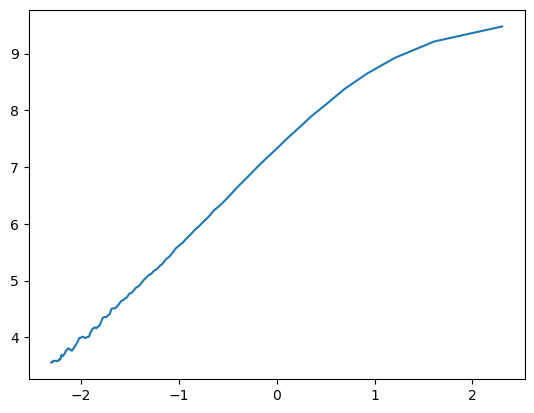

In [13]:
d_epsilon = []
for epsilon in np.arange(10,0,-0.1):
    d_epsilon.append(tuple((math.log(1/epsilon),math.log(N(epsilon)))))
    
plt.plot([x[0] for x in d_epsilon], [x[1] for x in d_epsilon])
plt.show()

#### Fit a line to the scaling region of the resulting plot to determine the capacity dimension of this trajectory.

In [14]:
scaling_region = [x for x in d_epsilon if (x[0] > -1 and x[0] < 1)]

line = stats.linregress(scaling_region)
print(line)

#scaling dimension ~= 1.638

LinregressResult(slope=1.6380047640724589, intercept=7.27787333818707, rvalue=0.9988953112271017, pvalue=1.0246254145323458e-30, stderr=0.01642853511300312, intercept_stderr=0.010210019866756265)
